Практическая работа №9

Специализированная настройка и улучшение качества графика

Задание 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
year, age_m, age_f = np.loadtxt(r'C:\Users\stud\Documents\vtm\pr9\eg7-marriage-ages.txt', unpack=True,skiprows=3)
fig = plt.figure()
ax = fig.add_subplot(111)
# Plot ages with male or female symbols as markers
ax.plot(year, age_m, marker='$\u2642$', markersize=14, c='blue', lw=2,mfc='blue', mec='blue')
ax.plot(year, age_f, marker='$\u2640$', markersize=14, c='magenta', lw=2,mfc='magenta', mec='magenta')
ax.grid()
ax.set_xlabel('Year')
ax.set_ylabel('Age')
ax.set_title('Median age at first marriage in the US, 1890 - 2010')
plt.show()

FileNotFoundError: C:\Users\stud\Documents\vtm\pr9\eg7-marriage-ages.txt not found.

Задание 2

FileNotFoundError: C:\Users\stud\Documents\vtm\pr9\us-city-populations\boston.tsv not found.

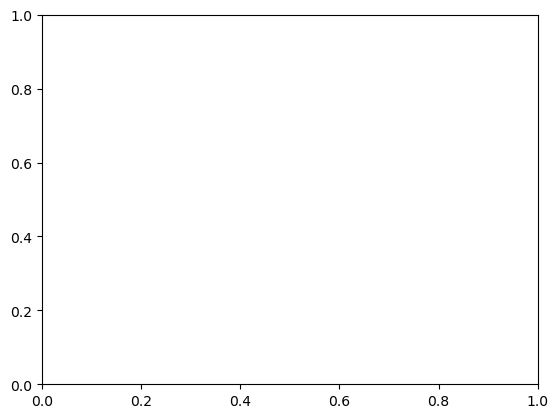

In [2]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cities = ['Boston', 'Houston', 'Detroit', 'San Jose', 'Phoenix']
# line styles: solid, dashes, dots, dash-dots, and dot-dot-dash
linestyles = [{'ls': '-'}, {'ls': '--'}, {'ls': ':'}, {'ls': '-.'},
              {'dashes': [2, 4, 2, 4, 8, 4]}]
for i, city in enumerate(cities):
    filename = 'C:\\Users\\stud\\Documents\\vtm\\pr9\\us-city-populations\\{}.tsv'.format(city.lower()).replace(' ', '_')
    yr, pop = np.loadtxt(filename, unpack=True)
    line, = ax.plot(yr, pop/1.e6, label=city, color='k', **linestyles[i])
ax.legend(loc='upper left')
ax.set_xlim(1800, 2020)
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
plt.show()

Задание 3

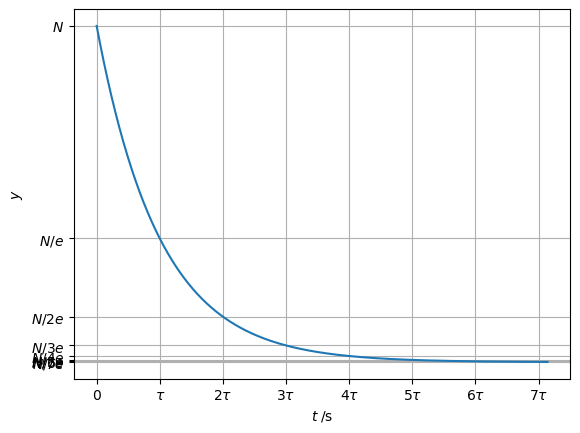

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initial value of y at t=0, lifetime in s
N, tau = 10000, 28
# Maximum time to consider (s)
tmax = 200
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 1000)
y = N * np.exp(-t/tau)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, y)
# The number of lifetimes that fall within the plotted time interval
ntau = tmax // tau + 1
# xticks at 0, tau, 2*tau, ..., ntau*tau; yticks at the corresponding y-values
xticks = [i*tau for i in range(ntau)]
yticks = [N * np.exp(-i) for i in range(ntau)]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# xtick labels: 0, tau, 2tau, ...
xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2,ntau)]
ax.set_xticklabels(xtick_labels)
# corresponding ytick labels: N, N/e, N/2e, ...
ytick_labels = [r'$N$',r'$N/e$'] + [r'$N/{}e$'.format(k) for k in range(2,ntau)]
ax.set_yticklabels(ytick_labels)
ax.set_xlabel(r'$t\;/\mathrm{s}$')
ax.set_ylabel(r'$y$')
ax.grid()
plt.show()
plt.draw()
fig.savefig('Lifetimes of an exponential decay.png', dpi=500)

Задание 4

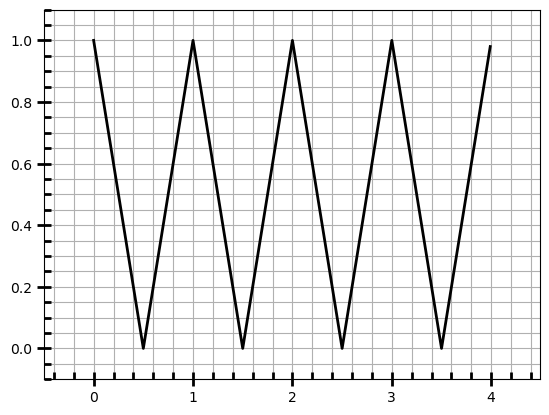

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# A selection of functions on rn abcissa points for 0 <= x < 1
rn = 100
rx = np.linspace(0, 1, rn, endpoint=False)

def tophat(rx):
    """ Top hat function: y = 1 for x < 0.5, y=0 for x >= 0.5 """
    ry = np.ones(rn)
    ry[rx>=0.5]=0
    return ry

# A dictionary of functions to choose from
ry = {'half-sawtooth': lambda rx: rx.copy(),
      'top-hat': tophat,
      'sawtooth': lambda rx: 2 * np.abs(rx-0.5)}

# Repeat the chosen function nrep times
nrep = 4
x = np.linspace(0, nrep, nrep*rn, endpoint=False)
y = np.tile(ry['sawtooth'](rx), nrep)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, 'k', lw=2)
# Add a bit of padding around the plotted line to aid visualization
ax.set_ylim(-0.1,1.1)
ax.set_xlim(x[0]-0.5, x[-1]+0.5)
# Customize the tick marks and turn the grid on
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.grid(which='both')
plt.show()

Задание 5

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Read in the data: day before fledging, wing loading and error for two broods.
dt = np.dtype([('day', 'i2'), ('wl1', 'f8'), ('wl1-err', 'f8'),
               ('wl2', 'f8'), ('wl2-err', 'f8')])
data = np.loadtxt(r'C:\Users\stud\Documents\vtm\pr9\fledging-data.csv', dtype=dt, delimiter=',')

# Weighted fit of exponential decay to the data. This is a linear least-squares
# problem because y = Aexp(-Bx) => ln y = ln A - Bx = mx + c.
p1_fit = np.poly1d(np.polyfit(data['day'], np.log(data['wl1']), 1,
                   w=np.log(data['wl1'])**-2))
p2_fit = np.poly1d(np.polyfit(data['day'], np.log(data['wl2']), 1,
                   w=np.log(data['wl2'])**-2))
wl1fit = np.exp(p1_fit(data['day']))
wl2fit = np.exp(p2_fit(data['day']))

# Plot the data points with their uncertainties and the fits.
fig, ax = plt.subplots()

# wl1 data: white circles, black borders, with error bars.
ax.errorbar(data['day'], data['wl1'], yerr=data['wl1-err'], ls='', marker='o',
             color='k', mfc='w', mec='k', capsize=3)
ax.plot(data['day'], wl1fit, 'k', lw=1.5)

# wl2 data: black filled circles, with error bars.
ax.errorbar(data['day'], data['wl2'], yerr=data['wl2-err'], ls='', marker='o',
             color='k', mfc='k', mec='k', capsize=3)
ax.plot(data['day'], wl2fit, 'k', lw=1.5)

ax.set_xlim(15, 0)
ax.set_ylim(0.003, 0.012)
ax.set_xlabel('days pre-fledging')
ax.set_ylabel('wing loading ($\mathrm{g\,mm^{-2}}$)')
plt.show()
plt.draw()
fig.savefig('Fledging bird weights.png', dpi=500)

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Gladipen\AppData\Local\Temp\ipykernel_8692\2737021998.py:34: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('wing loading ($\mathrm{g\,mm^{-2}}$)')
C:\Users\Gladipen\AppData\Local\Temp\ipykernel_8692\2737021998.py:34: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('wing loading ($\mathrm{g\,mm^{-2}}$)')


FileNotFoundError: C:\Users\stud\Documents\vtm\pr9\fledging-data.csv not found.

Задание 6

<>:30: SyntaxWarning: invalid escape sequence '\;'
<>:31: SyntaxWarning: invalid escape sequence '\T'
<>:30: SyntaxWarning: invalid escape sequence '\;'
<>:31: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Gladipen\AppData\Local\Temp\ipykernel_8692\3447164527.py:30: SyntaxWarning: invalid escape sequence '\;'
  ax.set_xlabel('$x\;/\mathrm{cm}$')
C:\Users\Gladipen\AppData\Local\Temp\ipykernel_8692\3447164527.py:31: SyntaxWarning: invalid escape sequence '\T'
  ax.set_ylabel('$\Theta\;/\mathrm{K}$')


(1269.2717173008039, 1354.59393668312) (1264.7698730442708, 1449.132666070314)
(1271.9229564260954, 1298.9179150519997) (1270.4934691800468, 1328.9371472190192)
(1272.7911798769105, 1281.2975523231937) (1272.3097253051226, 1290.7957685930114)


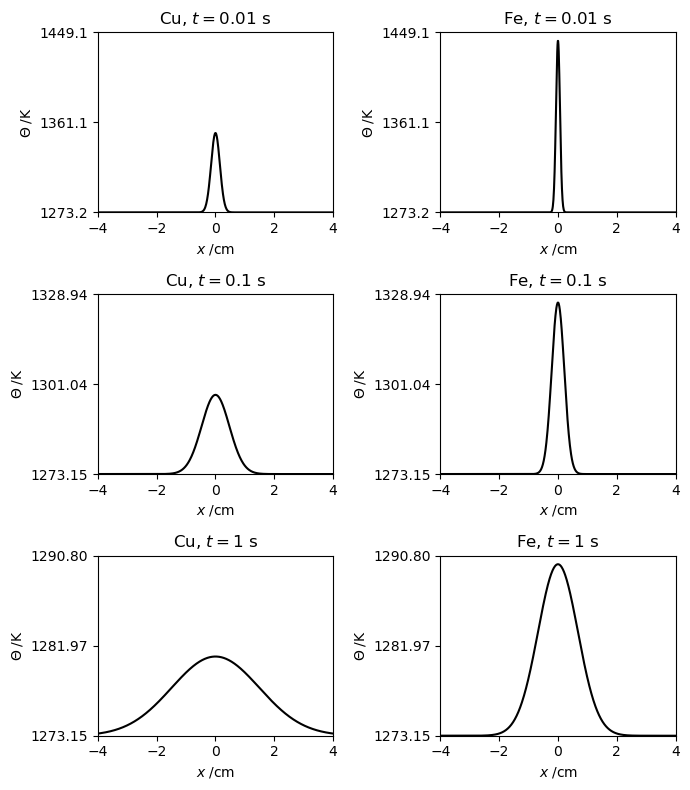

<Figure size 640x480 with 0 Axes>

In [7]:
# eg7-diffusion1d.py
import numpy as np
import matplotlib.pyplot as plt
# Cross sectional area of bar in m3, heat added at x=0 in J
A, H = 1.e-4, 1.e3
# Temperature in K at t=0
theta0 = 1273.15
# Metal element symbol, specific heat capacities per unit volume (J.m-3.K-1),
# Thermal diffusivities (m2.s-1) for Cu and Fe
metals = np.array([('Cu', 3.45e7, 1.11e-4), ('Fe', 3.50e7, 2.3e-5)],
                  dtype=[('symbol', '|S2'), ('cp', 'f8'), ('D', 'f8')])

# The metal bar extends from -xlim to xlim (m)
xlim, nx = 0.05, 1000
x = np.linspace(-xlim, xlim, nx)
# Calculate the temperature distribution at these three times
times = (1e-2, 0.1, 1)
# Create our subplots: three rows of times, one column for each metal
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 8))
for j, t in enumerate(times):
    for i, metal in enumerate(metals):
        symbol, cp, D = metal
        ax = axes[j, i]
        # The solution to the diffusion equation
        theta = theta0 + H/cp/A/np.sqrt(D*t * 4*np.pi) * np.exp(-x**2/4/D/t)
        # Plot, converting distances to cm and add some labelling
        ax.plot(x*100, theta, 'k')
        ax.set_title('{}, $t={}$ s'.format(symbol.decode('utf8'), t))
        ax.set_xlim(-4, 4)
        ax.set_xlabel('$x\;/\mathrm{cm}$')
        ax.set_ylabel('$\Theta\;/\mathrm{K}$')
# Set up the y axis so that each metal has the same scale at the same t
for j in (0,1,2):
    ymax = max(axes[j,0].get_ylim()[1], axes[j,1].get_ylim()[1])
    print(axes[j,0].get_ylim(), axes[j,1].get_ylim())
    for i in (0,1):
        ax = axes[j,i]
        ax.set_ylim(theta0, ymax)
        # Ensure there are only three y-tick marks
        ax.set_yticks([theta0, (ymax + theta0)/2, ymax])
# We don't want the subplots to bash into each other: tight_layout() fixes this
fig.tight_layout()
plt.show()
plt.draw()
fig.savefig('The one-dimensional diffusion equation.png', dpi=500)

Задание 7

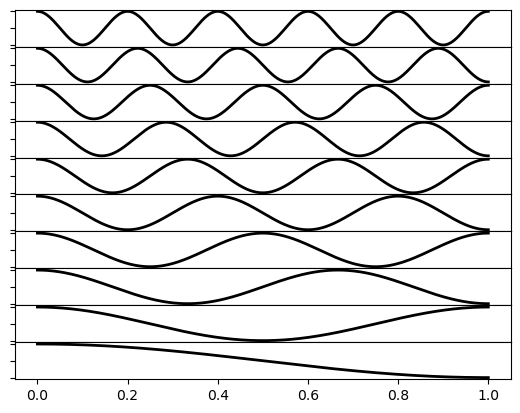

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
nrows = 10
fig, axes = plt.subplots(nrows,1)
# Zero vertical space between subplots
fig.subplots_adjust(hspace=0)
x = np.linspace(0,1,1000)
for i in range(nrows):
    # n=nrows for the top subplot, n=0 for the bottom subplot
    n = nrows - i
    axes[i].plot(x, np.cos(n * np.pi * x), 'k', lw=2)
    # We only want ticks on the bottom of each subplot
    axes[i].xaxis.set_ticks_position('bottom')
    if i < nrows-1:
        # Set ticks at the nodes (zeros) of our sine functions
        axes[i].set_xticks(np.arange(0, 1, 1/n))
        # We only want labels on the bottom subplot xaxis
        axes[i].set_xticklabels('')
    axes[i].set_yticklabels('')
plt.show()
plt.draw()
fig.savefig('Ganged subplots.png', dpi=100)